<a href="https://colab.research.google.com/github/srivas-divyansh/TechGigHackathon/blob/main/tg_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory Data Analysis (EDA)

In [2]:
#Extracting the dataframe from the csv file for training
train_data = pd.read_csv("https://raw.githubusercontent.com/gitsubh7/TechGigHackathon/main/Doceree-HCP_Train.csv",engine='python',encoding='latin1')

In [3]:
#Seeing the first five columns to get the idea of the data in csv file
train_data

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,114933,Desktop,2,68.82.97.126,051e4a06-4cb4-4b97-b0b1-d1c6a2b8e2c2,Philadelphia,19120.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/consultat...,Cardiovascular|Clinical|False|Male|Oncology|Ps...,207RP1001X,1.0
113933,114934,Desktop,2,104.172.11.109,3289bba5-4a50-4b61-a5cc-68596bbdc2bf,Van Nuys,914014213.0,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,Asthma|Arthritis|General|Clinical|Diagnosis|Rh...,2084P0800X,1.0
113934,114935,Desktop,7,174.21.94.113,9c36e90c-caa7-4323-8431-fb84f8293972,NaN,98105.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/39455-whats-th...,Rehabilitation|Transplantation|Clinical|Preven...,208000000X,1.0
113935,114936,Mobile,2,69.253.129.131,afc27760-31f7-4f6e-aa08-90d8a96525d0,Wilmington,19808.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.dermatologyadvisor.com/home/topics...,pain|disease|autoimmune|multiple sclerosis|gra...,2084P0800X,1.0


In [4]:
#Eliminating the unnecessary columns of from the dataframe
train_data.drop(['BIDREQUESTIP',	'USERPLATFORMUID','USERZIPCODE','USERAGENT','URL'],axis=1,inplace=True)

In [5]:
#Analyzing the statistical area of the dataframe
train_data.describe()

,ID,PLATFORM_ID,IS_HCP
count,113937.000000,113937.000000,113936.000000
mean,57969.000000,3.574993,0.299993
std,32890.923148,2.569019,0.458257
min,1001.000000,1.000000,0.000000
25%,29485.000000,2.000000,0.000000
50%,57969.000000,2.000000,0.000000
75%,86453.000000,6.000000,1.000000
max,114937.000000,16.000000,1.000000


In [6]:
#Getting the idea of row and column
train_data.shape

(113937, 9)

In [7]:
#Analyzing the data type of the columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            113937 non-null  int64  
 1   DEVICETYPE    113937 non-null  object 
 2   PLATFORM_ID   113937 non-null  int64  
 3   USERCITY      107578 non-null  object 
 4   PLATFORMTYPE  113937 non-null  object 
 5   CHANNELTYPE   113937 non-null  object 
 6   KEYWORDS      113937 non-null  object 
 7   TAXONOMY      32313 non-null   object 
 8   IS_HCP        113936 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 7.8+ MB


In [8]:
#Checking for null values
train_data.isnull().sum()

ID                  0
DEVICETYPE          0
PLATFORM_ID         0
USERCITY         6359
PLATFORMTYPE        0
CHANNELTYPE         0
KEYWORDS            0
TAXONOMY        81624
IS_HCP              1
dtype: int64

In [9]:
#Checking the unique taxonomy
train_data.TAXONOMY.unique()

array([nan, '2084P0800X', '2084P0804X', '2084N0400X', '2084V0102X',
       '207RC0000X', '2084S0012X', '207R00000X', '208000000X',
       '2084N0402X', '207RE0101X', '207Q00000X', '363LP0808X',
       '207W00000X', '2084N0600X', '207RI0200X', '2080P0207X',
       '207T00000X', '2084B0040X', '363AM0700X', '207RG0100X',
       '207RH0003X', '363LF0000X', '207N00000X', '207RG0300X',
       '202C00000X', '208M00000X', '207P00000X', '2083X0100X',
       '390200000X', '207V00000X', '207RC0200X', '363LP0200X',
       '363A00000X', '183500000X', '207X00000X', '207RP1001X',
       '207RA0401X', '208600000X', '207RH0002X', '363L00000X',
       '207RX0202X', '2084P2900X', '2084P0805X', '174400000X',
       '207RI0011X', '208100000X', '208D00000X', '204D00000X',
       '207QG0300X', '363LA2200X', '2084F0202X', '2084D0003X',
       '213ES0131X', '207RA0201X', '2080A0000X', '122300000X',
       '207RC0001X', '207RR0500X', '207RH0000X', '207ZP0105X',
       '2080P0206X', '207VE0102X', '2085R0001X', '

In [10]:
#Checking unique value in Platform type
train_data['PLATFORMTYPE'].unique()

array(['Online Medical Journal', 'Online Learning Portal',
       'Medical News Platform', 'Electronic Health Record',
       'Tele-medicine Platform'], dtype=object)

In [11]:
#Checking unique value in Channel type
train_data['CHANNELTYPE'].unique()

array(['Website'], dtype=object)

In [12]:
#Eliminating unnecessary column of Channel type
train_data.drop(['CHANNELTYPE'],axis=1,inplace=True)

In [13]:
train_data

,ID,DEVICETYPE,PLATFORM_ID,USERCITY,PLATFORMTYPE,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,Portland,Online Medical Journal,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,Arlington,Online Medical Journal,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,New Meadows,Online Medical Journal,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,NaN,Online Medical Journal,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,Houston,Online Medical Journal,Critical Care|Emergency Medicine|General Pract...,NaN,0.0
...,...,...,...,...,...,...,...,...
113932,114933,Desktop,2,Philadelphia,Online Medical Journal,Cardiovascular|Clinical|False|Male|Oncology|Ps...,207RP1001X,1.0
113933,114934,Desktop,2,Van Nuys,Online Medical Journal,Asthma|Arthritis|General|Clinical|Diagnosis|Rh...,2084P0800X,1.0
113934,114935,Desktop,7,NaN,Online Medical Journal,Rehabilitation|Transplantation|Clinical|Preven...,208000000X,1.0
113935,114936,Mobile,2,Wilmington,Online Medical Journal,pain|disease|autoimmune|multiple sclerosis|gra...,2084P0800X,1.0


In [14]:
#Checking anymore null values in dataframe
train_data.isnull().sum()

ID                  0
DEVICETYPE          0
PLATFORM_ID         0
USERCITY         6359
PLATFORMTYPE        0
KEYWORDS            0
TAXONOMY        81624
IS_HCP              1
dtype: int64

In [15]:
#Checking number of cases of HCP
train_data['IS_HCP'].value_counts()

0.0    79756
1.0    34180
Name: IS_HCP, dtype: int64

In [16]:
#Checking for anymore null values in dataframe
train_data.isnull().sum()

ID                  0
DEVICETYPE          0
PLATFORM_ID         0
USERCITY         6359
PLATFORMTYPE        0
KEYWORDS            0
TAXONOMY        81624
IS_HCP              1
dtype: int64

In [17]:
#Estimating the rows and columns after doing changes in the model
train_data.shape

(113937, 8)

In [18]:
#Checking the variation in data of taxanomy
train_data.TAXONOMY.value_counts()

2084P0800X    7930
2084N0400X    6621
207Q00000X    3997
207R00000X    3190
208000000X     837
              ... 
163WC0400X       1
246QM0706X       1
1835N1003X       1
207RI0008X       1
207XX0801X       1
Name: TAXONOMY, Length: 207, dtype: int64

In [19]:
#Checking unique values of Device type
train_data['DEVICETYPE'].unique()

array(['Desktop', 'Mobile', 'Tablet', 'Unknown'], dtype=object)

In [20]:
#Checking unique values of Platform type
train_data['PLATFORMTYPE'].unique()

array(['Online Medical Journal', 'Online Learning Portal',
       'Medical News Platform', 'Electronic Health Record',
       'Tele-medicine Platform'], dtype=object)

In [21]:
#Extracting the dataframe from the csv file for testing
test_data=pd.read_csv("https://raw.githubusercontent.com/gitsubh7/TechGigHackathon/main/Doceree-HCP_Test.csv")

In [22]:
#Seeing the first five columns to get the idea of the data in csv file
test_data.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS
0,115501,Desktop,2,75.189.231.103,0d5041ff-f0b6-4d1a-9ad7-0a29f7d485b4,Fayetteville,28305.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,Family Practice|Drainage|Clinical|Dermatology|...
1,115502,Mobile,2,24.101.33.158,c8396dd0-969f-4d99-a40b-b7bb1f516154,Conneaut Lake,16316.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.ophthalmologyadvisor.com/topics/ca...,General|Clinical|Operative|Medicine|Cardiology...
2,115503,Desktop,2,172.118.216.142,3c97a081-6518-43f8-9f26-369759cfb471,Covina,91724.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.psychiatryadvisor.com/author/tori-...,Abortion|Anxiety Disorders|Apnea|False|Trauma|...
3,115504,Desktop,7,71.105.120.171,3e2578c8-f794-41af-a38c-c5cfb3c0f014,Brooklyn,11226.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/105482-diverti...,Health|Male|Neurological Surgery|Otolaryngolog...
4,115505,Desktop,2,73.82.211.73,ec2ae7ce-6a8c-4156-98a7-07203e60f483,Marietta,30062.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.renalandurologynews.com/home/confe...,chronic kidney disease|pain|nephrology|disease...


In [23]:
#Analyzing the data type of the column
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28493 entries, 0 to 28492
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               28493 non-null  int64  
 1   DEVICETYPE       28493 non-null  object 
 2   PLATFORM_ID      28493 non-null  int64  
 3   BIDREQUESTIP     28493 non-null  object 
 4   USERPLATFORMUID  28493 non-null  object 
 5   USERCITY         26934 non-null  object 
 6   USERZIPCODE      27378 non-null  float64
 7   USERAGENT        28492 non-null  object 
 8   PLATFORMTYPE     28493 non-null  object 
 9   CHANNELTYPE      28493 non-null  object 
 10  URL              28493 non-null  object 
 11  KEYWORDS         28493 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.6+ MB


In [24]:
#Checking for null values in the dataframe
test_data.isnull().sum()

ID                    0
DEVICETYPE            0
PLATFORM_ID           0
BIDREQUESTIP          0
USERPLATFORMUID       0
USERCITY           1559
USERZIPCODE        1115
USERAGENT             1
PLATFORMTYPE          0
CHANNELTYPE           0
URL                   0
KEYWORDS              0
dtype: int64

In [25]:
#Eliminating the columns based on EDA of train dataset
test_data.drop(['BIDREQUESTIP',	'USERPLATFORMUID','USERZIPCODE','USERAGENT','URL','CHANNELTYPE'],axis=1,inplace=True)

In [26]:
#Importing label Encoder for encoding the object values of columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
train_data

,ID,DEVICETYPE,PLATFORM_ID,USERCITY,PLATFORMTYPE,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,Portland,Online Medical Journal,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,Arlington,Online Medical Journal,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,New Meadows,Online Medical Journal,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,NaN,Online Medical Journal,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,Houston,Online Medical Journal,Critical Care|Emergency Medicine|General Pract...,NaN,0.0
...,...,...,...,...,...,...,...,...
113932,114933,Desktop,2,Philadelphia,Online Medical Journal,Cardiovascular|Clinical|False|Male|Oncology|Ps...,207RP1001X,1.0
113933,114934,Desktop,2,Van Nuys,Online Medical Journal,Asthma|Arthritis|General|Clinical|Diagnosis|Rh...,2084P0800X,1.0
113934,114935,Desktop,7,NaN,Online Medical Journal,Rehabilitation|Transplantation|Clinical|Preven...,208000000X,1.0
113935,114936,Mobile,2,Wilmington,Online Medical Journal,pain|disease|autoimmune|multiple sclerosis|gra...,2084P0800X,1.0


In [28]:
train_data.at[73790,'IS_HCP']=0.0

In [29]:
#Transforming the values of the object type column and encoding them into integer for training dataset
train_data['DEVICETYPE']=le.fit_transform(train_data['DEVICETYPE'])
train_data['PLATFORMTYPE']=le.fit_transform(train_data['PLATFORMTYPE'])
train_data['USERCITY']=le.fit_transform(train_data['USERCITY'])
train_data['TAXONOMY']=le.fit_transform(train_data['TAXONOMY'])
train_data['IS_HCP']=train_data['IS_HCP'].astype(int)

In [30]:
#Transforming the values of the object type column and encoding them into integer for testing dataset
test_data['DEVICETYPE']=le.fit_transform(test_data['DEVICETYPE'])
test_data['PLATFORMTYPE']=le.fit_transform(test_data['PLATFORMTYPE'])
test_data['USERCITY']=le.fit_transform(test_data['USERCITY'])

In [31]:
#Dataset after the encoding for the values
train_data

,ID,DEVICETYPE,PLATFORM_ID,USERCITY,PLATFORMTYPE,KEYWORDS,TAXONOMY,IS_HCP
0,1001,0,2,3177,3,General|Endocrine|False|Medicine|Surgery|Urolo...,207,0
1,1002,0,2,130,3,Bone Marrow|Radiography|Chronic|Oncology|Psych...,207,0
2,1003,0,2,2701,3,General|Endocrine|False|Medicine|Surgery|Urolo...,207,0
3,1004,0,3,4420,3,Dental|Total|Clinical|Pharmacology|Physicians|...,149,1
4,1005,1,7,1767,3,Critical Care|Emergency Medicine|General Pract...,207,0
...,...,...,...,...,...,...,...,...
113932,114933,0,2,3067,3,Cardiovascular|Clinical|False|Male|Oncology|Ps...,69,1
113933,114934,0,2,4043,3,Asthma|Arthritis|General|Clinical|Diagnosis|Rh...,149,1
113934,114935,0,7,4420,3,Rehabilitation|Transplantation|Clinical|Preven...,112,1
113935,114936,1,2,4322,3,pain|disease|autoimmune|multiple sclerosis|gra...,149,1


In [32]:
#Checking for anymore object type values in the training dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            113937 non-null  int64 
 1   DEVICETYPE    113937 non-null  int64 
 2   PLATFORM_ID   113937 non-null  int64 
 3   USERCITY      113937 non-null  int64 
 4   PLATFORMTYPE  113937 non-null  int64 
 5   KEYWORDS      113937 non-null  object
 6   TAXONOMY      113937 non-null  int64 
 7   IS_HCP        113937 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 7.0+ MB


In [33]:
#Installing neattext for analyzing the keywords
!pip install neattext

In [34]:
#Importing neattext into the notebook
import neattext.functions as nfx

In [35]:
#Eliminating unnecessay punctuation marks from the keywords from training dataset
train_data['KEYWORDS']=train_data['KEYWORDS'].str.replace('|',' ')

<ipython-input-35-4235b41c04cd>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_data['KEYWORDS']=train_data['KEYWORDS'].str.replace('|',' ')


In [36]:
#Eliminating unnecessay punctuation marks from the keywords from testing dataset
test_data['KEYWORDS']=train_data['KEYWORDS'].str.replace('|',' ')

<ipython-input-36-65fa10c1a8db>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_data['KEYWORDS']=train_data['KEYWORDS'].str.replace('|',' ')


In [37]:
#Removing stopwords to prevent deviation of data from training dataset
train_data['KEYWORDS']=train_data['KEYWORDS'].apply(nfx.remove_stopwords)

In [38]:
#Eliminating unnecessay punctuation marks from the keywords from testing dataset
test_data['KEYWORDS']=test_data['KEYWORDS'].apply(nfx.remove_stopwords)

In [39]:
#Lowering the alphabets of the keywords of the training dataset
train_data['KEYWORDS']=train_data['KEYWORDS'].str.lower()

In [40]:
#Lowering the alphabets of the keywords of the testing dataset
test_data['KEYWORDS']=test_data['KEYWORDS'].str.lower()

In [41]:
#Train data after the filtering and cleaning the keywords section
train_data

,ID,DEVICETYPE,PLATFORM_ID,USERCITY,PLATFORMTYPE,KEYWORDS,TAXONOMY,IS_HCP
0,1001,0,2,3177,3,general endocrine false medicine surgery urolo...,207,0
1,1002,0,2,130,3,bone marrow radiography chronic oncology psych...,207,0
2,1003,0,2,2701,3,general endocrine false medicine surgery urolo...,207,0
3,1004,0,3,4420,3,dental total clinical pharmacology physicians ...,149,1
4,1005,1,7,1767,3,critical care emergency medicine general pract...,207,0
...,...,...,...,...,...,...,...,...
113932,114933,0,2,3067,3,cardiovascular clinical false male oncology ps...,69,1
113933,114934,0,2,4043,3,asthma arthritis general clinical diagnosis rh...,149,1
113934,114935,0,7,4420,3,rehabilitation transplantation clinical preven...,112,1
113935,114936,1,2,4322,3,pain disease autoimmune multiple sclerosis gra...,149,1


# Model Training

In [42]:
#Importing the training model, CountVectorizer, Pipelines, MultiOutputClassifier and other important libraries for training the model for the prediction
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.multioutput import MultiOutputClassifier

from sklearn.preprocessing import StandardScaler

In [43]:
#Removing the null values of taxonomy with zeroes
train_data['TAXONOMY']=train_data['TAXONOMY'].fillna('0')

In [44]:
#Analyzing the pairwise correlation among the different columns
train_data.corr()

<ipython-input-44-1c55db0db190>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,ID,DEVICETYPE,PLATFORM_ID,USERCITY,PLATFORMTYPE,TAXONOMY,IS_HCP
ID,1.000000,-0.001972,0.000387,-0.002008,0.001692,-0.001536,-0.002469
DEVICETYPE,-0.001972,1.000000,-0.140293,0.011754,-0.057857,-0.104402,0.102780
PLATFORM_ID,0.000387,-0.140293,1.000000,0.053316,-0.341289,0.059336,0.036410
USERCITY,-0.002008,0.011754,0.053316,1.000000,0.027213,-0.016159,0.002883
PLATFORMTYPE,0.001692,-0.057857,-0.341289,0.027213,1.000000,-0.026473,-0.094294
TAXONOMY,-0.001536,-0.104402,0.059336,-0.016159,-0.026473,1.000000,-0.824329
IS_HCP,-0.002469,0.102780,0.036410,0.002883,-0.094294,-0.824329,1.000000


In [45]:
#Initializing the vectorizer with CountVectorizer
vectorizer = CountVectorizer()

In [46]:
#Transforming the keywords into the vector and converting into matrix for the traning dataset
vectorized_column = vectorizer.fit_transform(train_data['KEYWORDS'])
vectorized_column = vectorized_column.toarray()

In [47]:
#Transforming the keywords into the vector and converting into matrix for the traning dataset
vectorizedxtest=vectorizer.fit_transform(test_data['KEYWORDS'])
vectorized_xtest = vectorizedxtest.toarray()

In [48]:
#Vectorized text in the form of matrix for the training dataset
vectorized_column

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
#Vectorized text in the form of matrix for the testing dataset
vectorized_xtest

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
#Eliminating object type column of keywords from the training dataset
train_data.drop(['KEYWORDS'],axis=1,inplace=True)

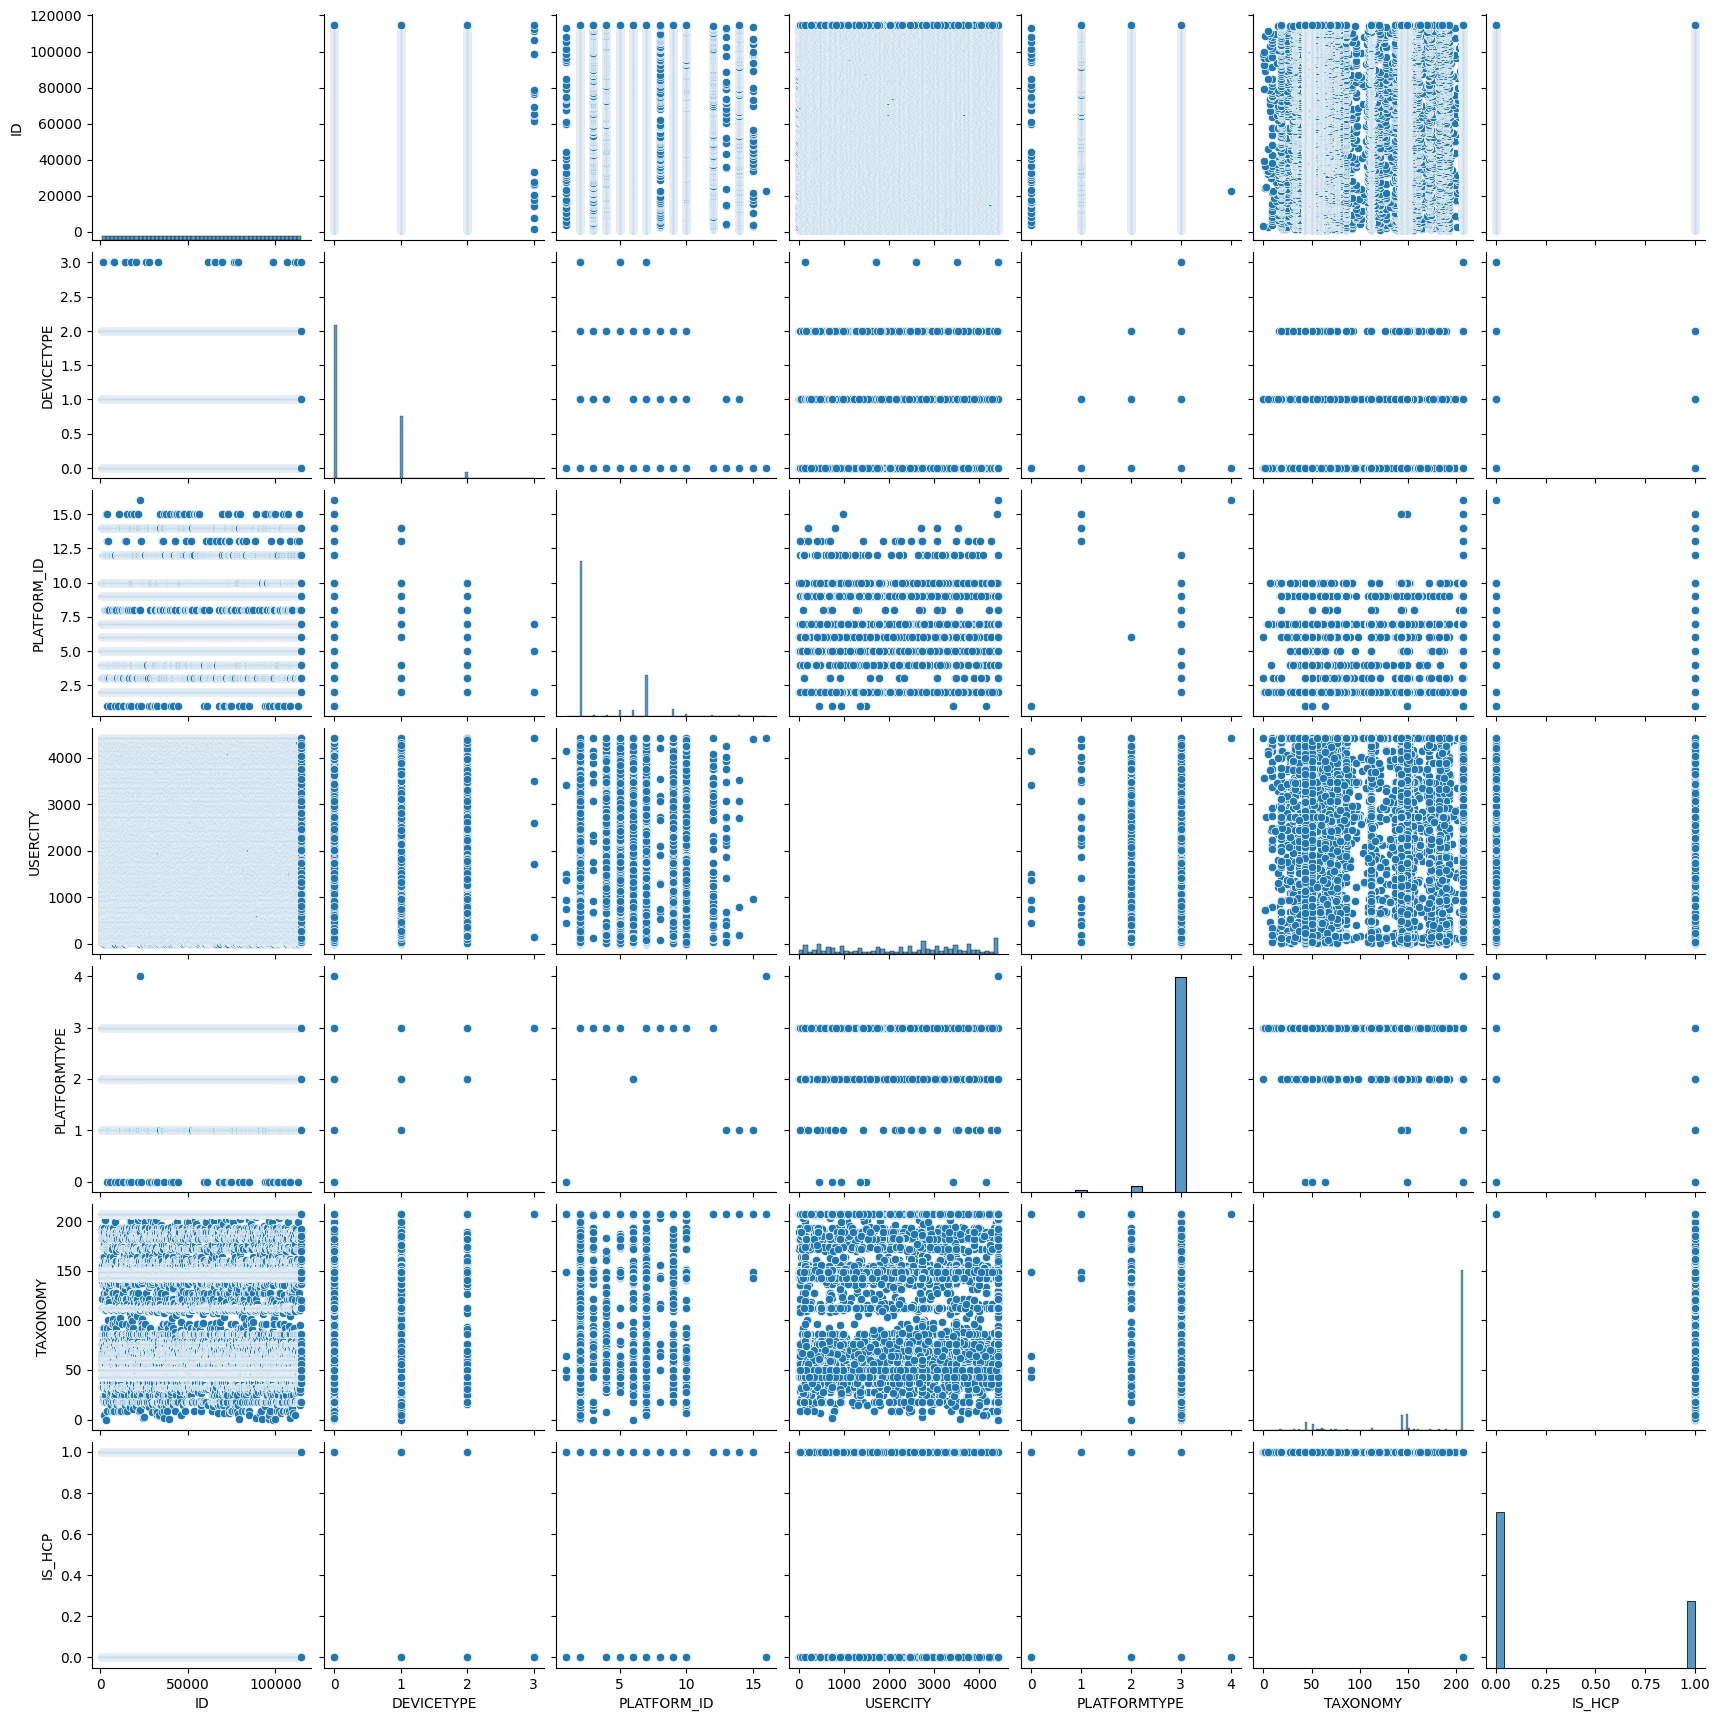

In [51]:
sns.pairplot(train_data)

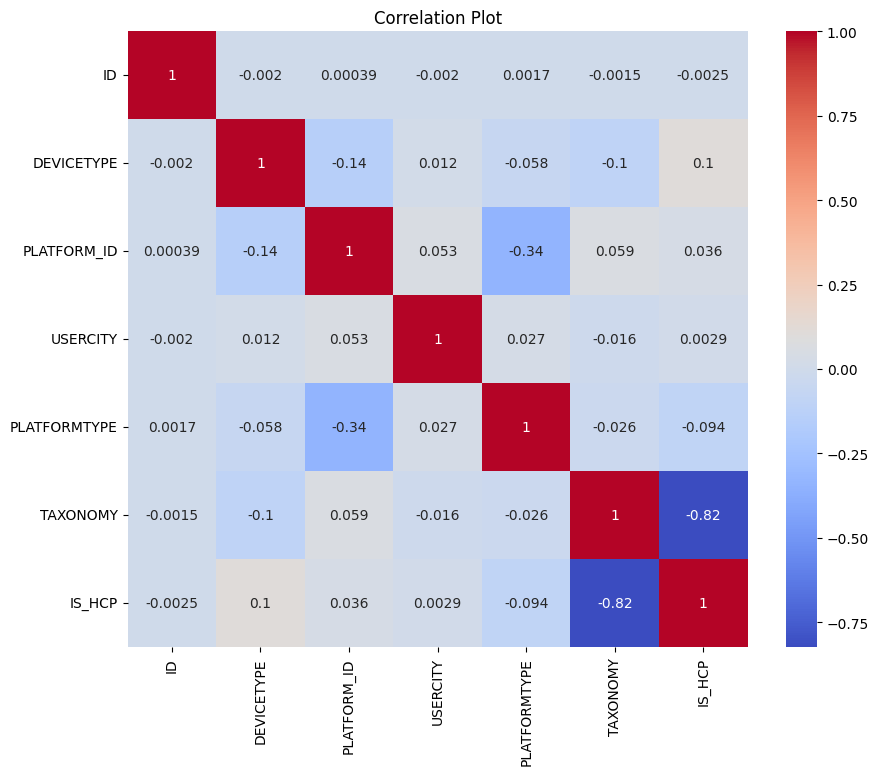

In [52]:
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()


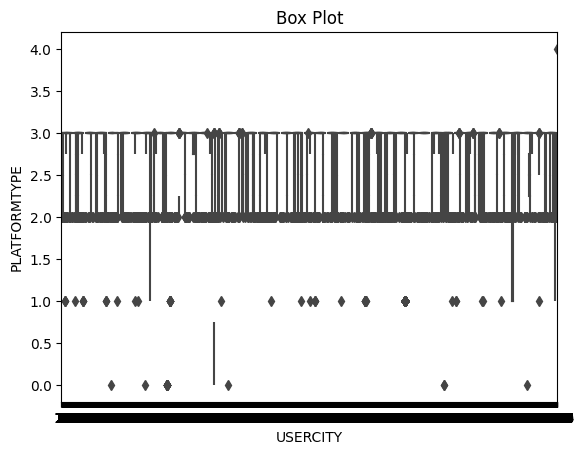

In [53]:
sns.boxplot(x='USERCITY', y='PLATFORMTYPE', data=train_data)
plt.title('Box Plot')
plt.show()


In [54]:
#Eliminating object type column of keywords from the training dataset
test_data.drop(['KEYWORDS'],axis=1,inplace=True)

In [55]:
#Concatenating the vectorized column with the dataframe and convert them into matrix
feature_matrix = np.concatenate((vectorized_column, train_data), axis=1)

In [56]:
#Seperating X and y from the matrix for the training and testing
X=train_data.iloc[:,:-2]
y=train_data.iloc[:,-2:]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)
X_testid=X_test.ID


In [57]:
#Converting the matrix back into the dataframe format
X_testid=pd.DataFrame(X_testid)

In [58]:
X_testid = X_testid.reset_index(drop=True)

In [59]:
#Seperating X and y from the matrix
X=feature_matrix[:,:-2]
y=feature_matrix[:,-2:]

In [60]:
#Spliting the training data and testing data of our model
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [61]:
X_test

array([[   0,    0,    0, ...,    2, 3687,    3],
       [   0,    0,    0, ...,    7,  487,    3],
       [   0,    0,    0, ...,    2,  342,    3],
       ...,
       [   0,    0,    0, ...,    2, 3756,    3],
       [   0,    0,    0, ...,    2,  693,    3],
       [   0,    0,    0, ...,    2, 3257,    3]])

In [62]:
#Converting X_train and y_train into dataframe type
X_train = pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)

In [63]:
X_test

array([[   0,    0,    0, ...,    2, 3687,    3],
       [   0,    0,    0, ...,    7,  487,    3],
       [   0,    0,    0, ...,    2,  342,    3],
       ...,
       [   0,    0,    0, ...,    2, 3756,    3],
       [   0,    0,    0, ...,    2,  693,    3],
       [   0,    0,    0, ...,    2, 3257,    3]])

In [64]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243
0,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,59533,0,2,2718,3
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,16565,0,2,3756,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,86840,0,2,1767,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,13511,0,7,2703,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,94094,0,7,2496,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,77821,0,2,2249,3
79751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,111269,0,2,464,3
79752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,104695,0,7,2079,3
79753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1861,2,2,3846,3


In [65]:
y_train

,0,1
0,33,1
1,207,0
2,207,0
3,207,0
4,207,0
...,...,...
79750,18,1
79751,207,0
79752,207,0
79753,43,1


In [66]:
y_test

array([[143,   1],
       [143,   1],
       [207,   0],
       ...,
       [207,   0],
       [ 43,   1],
       [207,   0]])

In [67]:
#Initializing the classifier for model training and multiple output
base_classifier=RandomForestClassifier()
multi_output_classifier = MultiOutputClassifier(base_classifier)

In [68]:
#Fitting the model
multi_output_classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [69]:
#Converting the test data into the dataframe
X_test=pd.DataFrame(X_test)
y_test=pd.DataFrame(y_test)

In [70]:
#Prediction from the test data
y_pred = multi_output_classifier.predict(X_test)
y_pred = pd.DataFrame(y_pred)

In [71]:
##Accuracy score of our model
print(multi_output_classifier.score(X_test,y_test)*100)

83.09344099233515


In [72]:
y_pred[y_pred[1]==1].value_counts()

0    1
149  1    2814
143  1    2089
43   1    1125
50   1     880
207  1     709
          ... 
167  1       1
169  1       1
74   1       1
53   1       1
0    1       1
Length: 136, dtype: int64

In [73]:
X_testid

,ID
0,16344
1,56981
2,47942
3,43396
4,59128
...,...
34177,35480
34178,18052
34179,52226
34180,70554


In [74]:
y_pred['ID']=X_testid['ID']

In [75]:
y_pred

,0,1,ID
0,207,0,16344
1,143,1,56981
2,207,0,47942
3,149,1,43396
4,207,0,59128
...,...,...,...
34177,143,1,35480
34178,149,1,18052
34179,207,0,52226
34180,43,1,70554


In [76]:
y_pred=y_pred.set_index('ID')

In [77]:
y_pred

,0,1
ID,,
16344,207,0
56981,143,1
47942,207,0
43396,149,1
59128,207,0
...,...,...
35480,143,1
18052,149,1
52226,207,0


In [78]:
new_labels = ['TAXONOMY', 'IS_HCP']
y_pred.columns = new_labels

In [79]:
y_pred

,TAXONOMY,IS_HCP
ID,,
16344,207,0
56981,143,1
47942,207,0
43396,149,1
59128,207,0
...,...,...
35480,143,1
18052,149,1
52226,207,0


In [80]:
# TAXONOMY =207 represents NULL for taxonomy,
# as correspondingly IS_HCP =0 , i.e No taxonomy exists when the person is not an HCP

In [81]:
y_pred.to_csv('output.csv')